# Project 3: Local Ethiopian Restaurants with Yelp Fusion API 
#### Emily Feuss <br> April 21st, 2024

I would like to use Yelp Fusion to find Ethiopian restaurants around Morristown, NJ and take a look at the reviews to find the best new ones to try.

In [4]:
import requests
import yelpkeys  # file where client_id and api_key is defined with user's private app information
from textblob import TextBlob

In [5]:
APIKEY = yelpkeys.api_key
headers = {'Authorization': 'Bearer %s' % yelpkeys.api_key,}

In [9]:
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib

from urllib.error import HTTPError
from urllib.parse import quote
from urllib.parse import urlencode

In [11]:
# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.

# Search Parameters

In [39]:
# Defaults for our simple example.
DEFAULT_TERM = 'ethiopian'
DEFAULT_LOCATION = 'Morristown, NJ'
SEARCH_LIMIT = 20

# Search functions

### Given your API_KEY, send a GET request to the API.
Output is final response that we will work with

In [ ]:
# host (str): The domain host of the API.
# path (str): The path of the API after the domain.
# API_KEY (str): Your API Key.
# url_params (dict): An optional set of query parameters in the request.

# RETURNS dict: The JSON response from the request.
# HTTPError: An error occurs from the HTTP request.
    
def request(host, path, api_key, url_params=None):

    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()

### Query the Search API by a search term and location.
Sends output into request() function

In [21]:
# term (str): The search term passed to the API.
# location (str): The search location passed to the API.

# RETUNRS dict: The JSON response from the request.

def search(api_key, term, location):
    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


### Query the Business API by a business ID.
Sends output into request() function

In [22]:
# business_id (str): The ID of the business to query.
# RETURNS dict: The JSON response from the request.

def get_business(api_key, business_id):
    business_path = BUSINESS_PATH + business_id
    return request(API_HOST, business_path, api_key)

### Queries the API by the input values from the user..
Sends output into request() function

In [30]:
# term (str): The search term to query.
# location (str): The location of the business to query.

def query_api(term, location):

    response = search(API_KEY, term, location)

    businesses = response.get('businesses')

    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return

    business_id = businesses[0]['id']

    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(API_KEY, business_id)

    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)

---
# Querying API
Looking for Ethiopian restaurants near Morristown, NJ

In [35]:
response = search(API_KEY,'ethiopian', 'Morristown,NJ')

Querying https://api.yelp.com/v3/businesses/search ...


In [116]:
# response

In [65]:
all_reviews = []
for business in response['businesses']:
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        all_reviews.append(review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'])
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            print('    Sentiment: Positive')
        elif sentiment < 0:
            print('    Sentiment: Negative')
        else:
            print('    Sentiment: Neutral')
        print('\n================\n\n\n')

Business Name: Walia Ethiopian Restaurant
Rating: 4.6
Review Count: 256
Reviews: 
Querying https://api.yelp.com/v3/businesses/XKeKEbS5OPYiHcBE-qXchA/reviews ...
 - Love the Ethiopian food and vegetarian selections! Great place great food!
We have known the owners family for a long time, and they never disappoint. Go there!
    Sentiment: Positive




 - Decided to come here for dinner on a weekday while visiting the downtown area.  Restaurant is located very close to Starbucks, parking lots and train...
    Sentiment: Positive




 - A birthday dinner was in order and Walia was up to the task! Love, love, love Walia 
We had a meat plate for two and an appetizer. You must visit this...
    Sentiment: Positive




Business Name: Mesob Ethiopian Restaurant
Rating: 4.2
Review Count: 822
Reviews: 
Querying https://api.yelp.com/v3/businesses/gshKE5HBOLJYWRENZ-Ulkg/reviews ...
 - Friendly staff and delicious morsels with every bite. When you need to break the fun of your home cooked meal, or 

 - Love this place. Laid-back atmosphere. Good friendly service and excellent food! Another win for The Heights!!
    Sentiment: Positive




 - It is hard to find affordable Ethiopian food in NYC. So, will walking in Washington Heights, we notice this restaurant we needed to try.

Food: 5/5

I...
    Sentiment: Negative




 - Truly, the best Ethiopian food I've ever had (including all my favorite spots in DC). The flavors were perfect and just spicy enough (and I love spice!)....
    Sentiment: Positive




Business Name: Awash Ethiopian Restaurant
Rating: 3.8
Review Count: 384
Reviews: 
Querying https://api.yelp.com/v3/businesses/pwarWuPn7Aw_il-epzJEgg/reviews ...
 - Acknowledging that I've never tried Ethiopian food before and didn't know what to expect, I became a huge fan after dining at Awash. Wrapping up a day of...
    Sentiment: Positive




 - I wasn't exactly disappointed with this meal but I much preferred the meal I had at Bati Ethiopian in Clinton hill.

In comparison, t

### Comparing local restaurants just by rating and counts so I can compare to my favorite, Mesob, to try to find some new comparable restaurants to try!

In [117]:
for business in response['businesses']:
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))

Business Name: Walia Ethiopian Restaurant
Rating: 4.6
Review Count: 256
Business Name: Mesob Ethiopian Restaurant
Rating: 4.2
Review Count: 822
Business Name: Dashen Ethiopian Cuisine
Rating: 4.3
Review Count: 317
Business Name: Asanka Delight
Rating: 4.5
Review Count: 48
Business Name: Bersi Ethiopian Restaurant
Rating: 4.8
Review Count: 20
Business Name: Abyssinia Ethiopian Restaurant
Rating: 4.3
Review Count: 268
Business Name: Benyam Cuisine
Rating: 4.8
Review Count: 169
Business Name: Ada's Gojjo
Rating: 4.6
Review Count: 261
Business Name: Garden City Restaurant
Rating: 4.0
Review Count: 33
Business Name: Haile Bistro
Rating: 4.4
Review Count: 306
Business Name: Ras Plant Based
Rating: 4.8
Review Count: 390
Business Name: Addey Ababa
Rating: 4.9
Review Count: 26
Business Name: Awash Ethiopian Restaurant
Rating: 3.8
Review Count: 384
Business Name: Meazash cuisine
Rating: 5.0
Review Count: 4
Business Name: Bunna Cafe
Rating: 4.5
Review Count: 815
Business Name: Massawa
Rating: 4.2

## Analysis on all reviews of all restaurants

In [67]:
len(all_reviews)

60

In [70]:
text_reviews = str(all_reviews)

In [73]:
blobr = TextBlob(text_reviews)
sentiment = blob.sentiment
sentiment

Sentiment(polarity=0.375, subjectivity=0.4666666666666667)

In [76]:
from textblob.sentiments import NaiveBayesAnalyzer
blobNB = TextBlob(text_reviews, analyzer=NaiveBayesAnalyzer())

In [78]:
sentiment2 = blobNB.sentiment
sentiment2

Sentiment(classification='pos', p_pos=1.0, p_neg=1.1124832019263826e-23)

## Ethiopian restaurants in the area receive largely positive reviews.

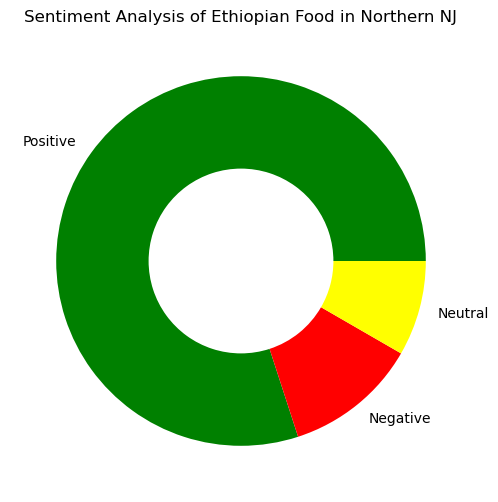

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
pos = 48
neu = 5
neg = 7
labels = ['Positive', 'Negative', 'Neutral']
values = [pos, neg, neu]

# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red', 'yellow'])
ax.set_title('Sentiment Analysis of Ethiopian Food in Northern NJ')

plt.show()

## Word cloud generation

In [82]:
from nltk.corpus import stopwords
stops = stopwords.words('english')

In [83]:
items = blobr.word_counts.items()

In [84]:
items = [item for item in items if item[0] not in stops]

In [103]:
other_stops = ["n't", "5", "3"]

In [104]:
items = [item for item in items if item[0] not in other_stops]

In [105]:
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [111]:
top = sorted_items[1:51]

In [112]:
import pandas as pd
df = pd.DataFrame(top, columns=['word', 'count'])
df

,word,count
0,ethiopian,27
1,great,13
2,love,11
3,place,11
4,restaurant,11
5,spot,8
6,service,8
7,time,7
8,never,7
9,good,7


In [113]:
import imageio.v2 as imageio

mask_image = imageio.imread('mask_heart.png')

from wordcloud import WordCloud

wordcloud = WordCloud(colormap='viridis', mask=mask_image, background_color='white')

In [114]:
wordcloud = wordcloud.generate(str(top50))

In [115]:
wordcloud = wordcloud.to_file('ethiopian_heart.jpg')